In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = pd.read_pickle('cleaned_data.pkl')

In [3]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
0,0,7150274721,3,63,117,9,1621,0,22,7,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",39,1683851172,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,0,1,0,0,0,3,4,372,94,0,88,236,36,63,0,147,288.00,0,1,0.04,209,0,14,9869.00,10050,11157,413,94,0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,0.60,0,1800,800,0,0,1,1,1,1,0,0,0,0,0
1,0,7150256183,51,63,117,15,1764,17,22,7,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",43,1683848869,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,0,5,0,0,0,5,7,393,12,0,174,75,63,61,36,147,331.00,1,1,0.03,168,0,16,10968.00,11554,14494,493,12,2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,0.60,2,1800,800,0,0,0,1,0,0,1,0,1,1,0
2,0,7150214339,3,63,117,42,3274,24,22,7,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",43,1683844129,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,0,10,0,0,4204,4,9,593,67,0,137,208,40,160,63,147,362.00,5,15,0.27,396,0,27,29983.00,32358,44199,810,67,2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,0,1800,800,0,0,0,1,0,1,1,0,0,0,0
3,0,7150179312,63,0,117,38,1739,138,22,7,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",10,1683840942,1983,0,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,0,Techies,0,2,0,0,0,9,2,205,105,1,0,60,0,0,0,180,675.00,0,2,0.07,51,0,11,5269.00,5941,7361,254,105,0.25,75,1.00,3.00,12,14,19,14,25,2.50,1.30,3.00,700,900,1.70,100,0.50,300,0.60,6,1800,800,1,1,1,0,1,0,0,0,1,0,0
4,0,7148918745,3,15,117,68,3743,65,22,7,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",80,1683771256,6,32,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,129,Spectre,0,27,0,0,0,11,11,614,67,0,160,208,137,127,63,147,309.00,3,11,0.18,388,0,29,30477.00,38303,46350,743,67,2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,0,1800,800,0,0,0,1,0,1,1,0,0,0,0


In [4]:
data.shape

(5382, 81)

In [5]:
data.columns

Index(['my_win', 'match_id', 'barracks_status_dire', 'barracks_status_radiant',
       'cluster', 'dire_score', 'duration', 'first_blood_time', 'game_mode',
       'lobby_type', 'picks_bans', 'radiant_score', 'start_time',
       'tower_status_dire', 'tower_status_radiant', 'players', 'patch',
       'region', 'player_slot', 'hero', 'abandons', 'assists', 'backpack_0',
       'backpack_1', 'backpack_2', 'deaths', 'denies', 'gold_per_min',
       'hero_id', 'isRadiant', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'item_neutral', 'kda', 'kills', 'kills_per_min',
       'last_hits', 'leaver_status', 'level', 'net_worth', 'total_gold',
       'total_xp', 'xp_per_min', 'id', 'base_health_regen', 'base_mana',
       'base_mana_regen', 'base_armor', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_

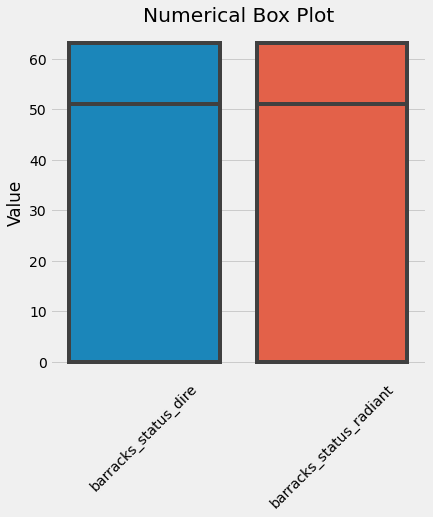

In [6]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['barracks_status_dire', 'barracks_status_radiant']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

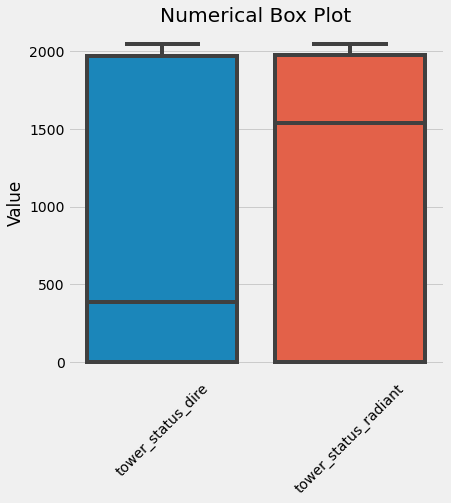

In [7]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['tower_status_dire', 'tower_status_radiant']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

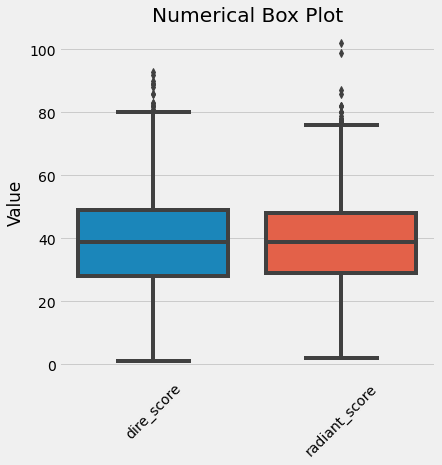

In [8]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['dire_score', 'radiant_score']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

In [9]:
sns.jointplot(x="my_win", y="dire_score", data=df, height=10, ratio=3, color="blue")
plt.show()

NameError: name 'df' is not defined

In [ ]:
sns.jointplot(x="my_win", y="radiant_score", data=df, height=10, ratio=3, color="blue")
plt.show()

In [ ]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['assists', 'deaths', 'kills', 'kda']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


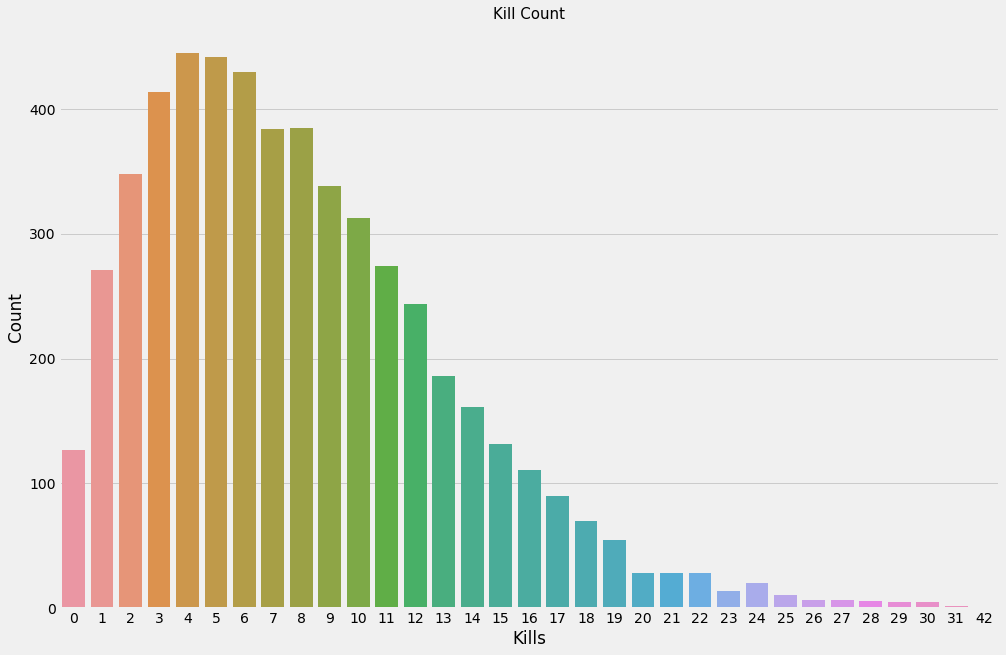

In [10]:
df = data.copy()
plt.figure(figsize=(15,10))
sns.countplot(df.kills.sort_values())
plt.title("Kill Count",fontsize=15)
plt.xlabel('Kills', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

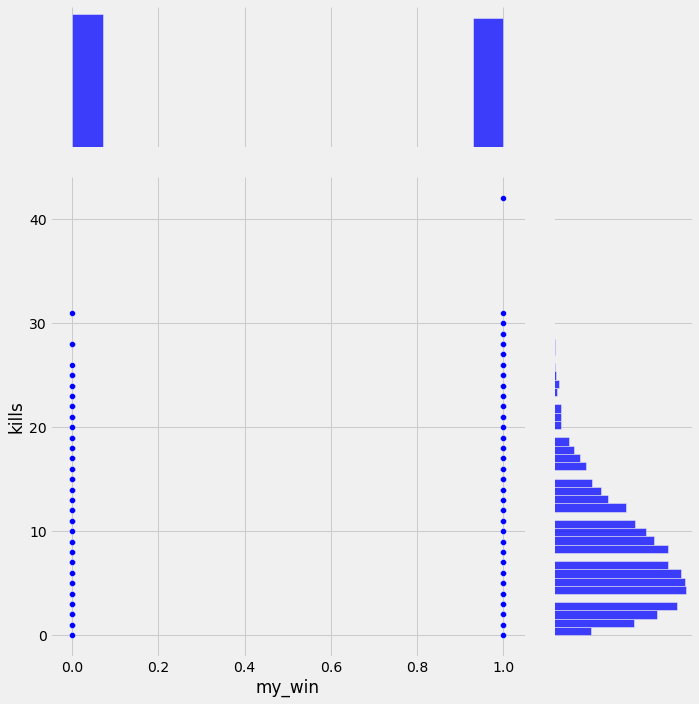

In [11]:
sns.jointplot(x="my_win", y="kills", data=df, height=10, ratio=3, color="blue")
plt.show()

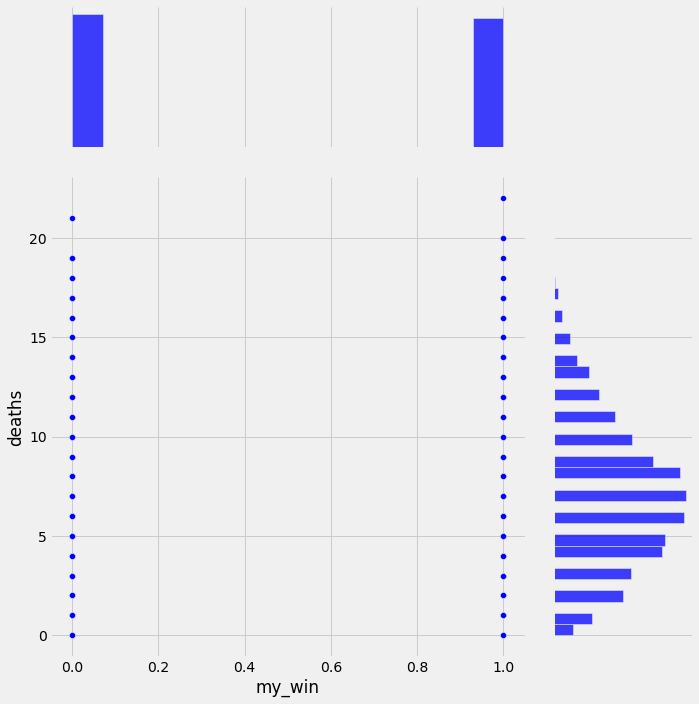

In [12]:
sns.jointplot(x="my_win", y="deaths", data=df, height=10, ratio=3, color="blue")
plt.show()

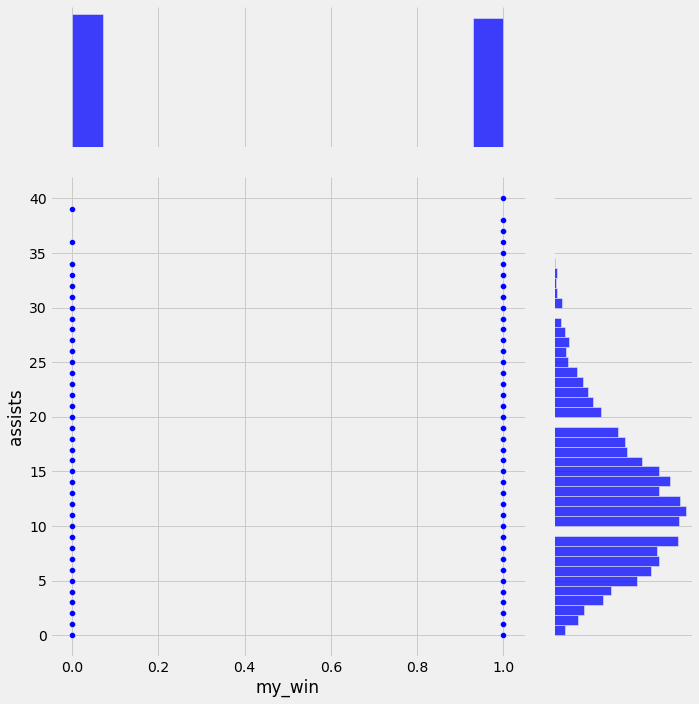

In [13]:
sns.jointplot(x="my_win", y="assists", data=df, height=10, ratio=3, color="blue")
plt.show()

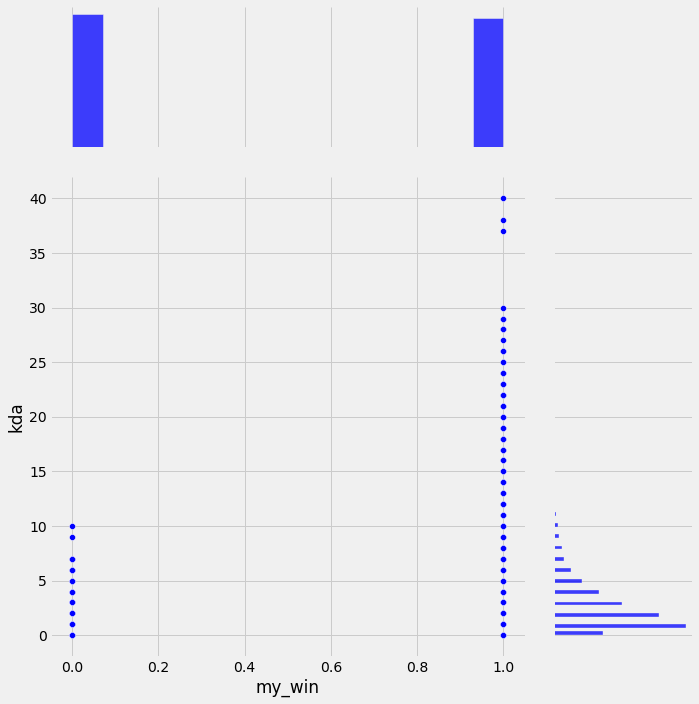

In [14]:
# Very correlated with winning. mmmm. what do I do wuth this?
sns.jointplot(x="my_win", y="kda", data=df, height=10, ratio=3, color="blue")
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


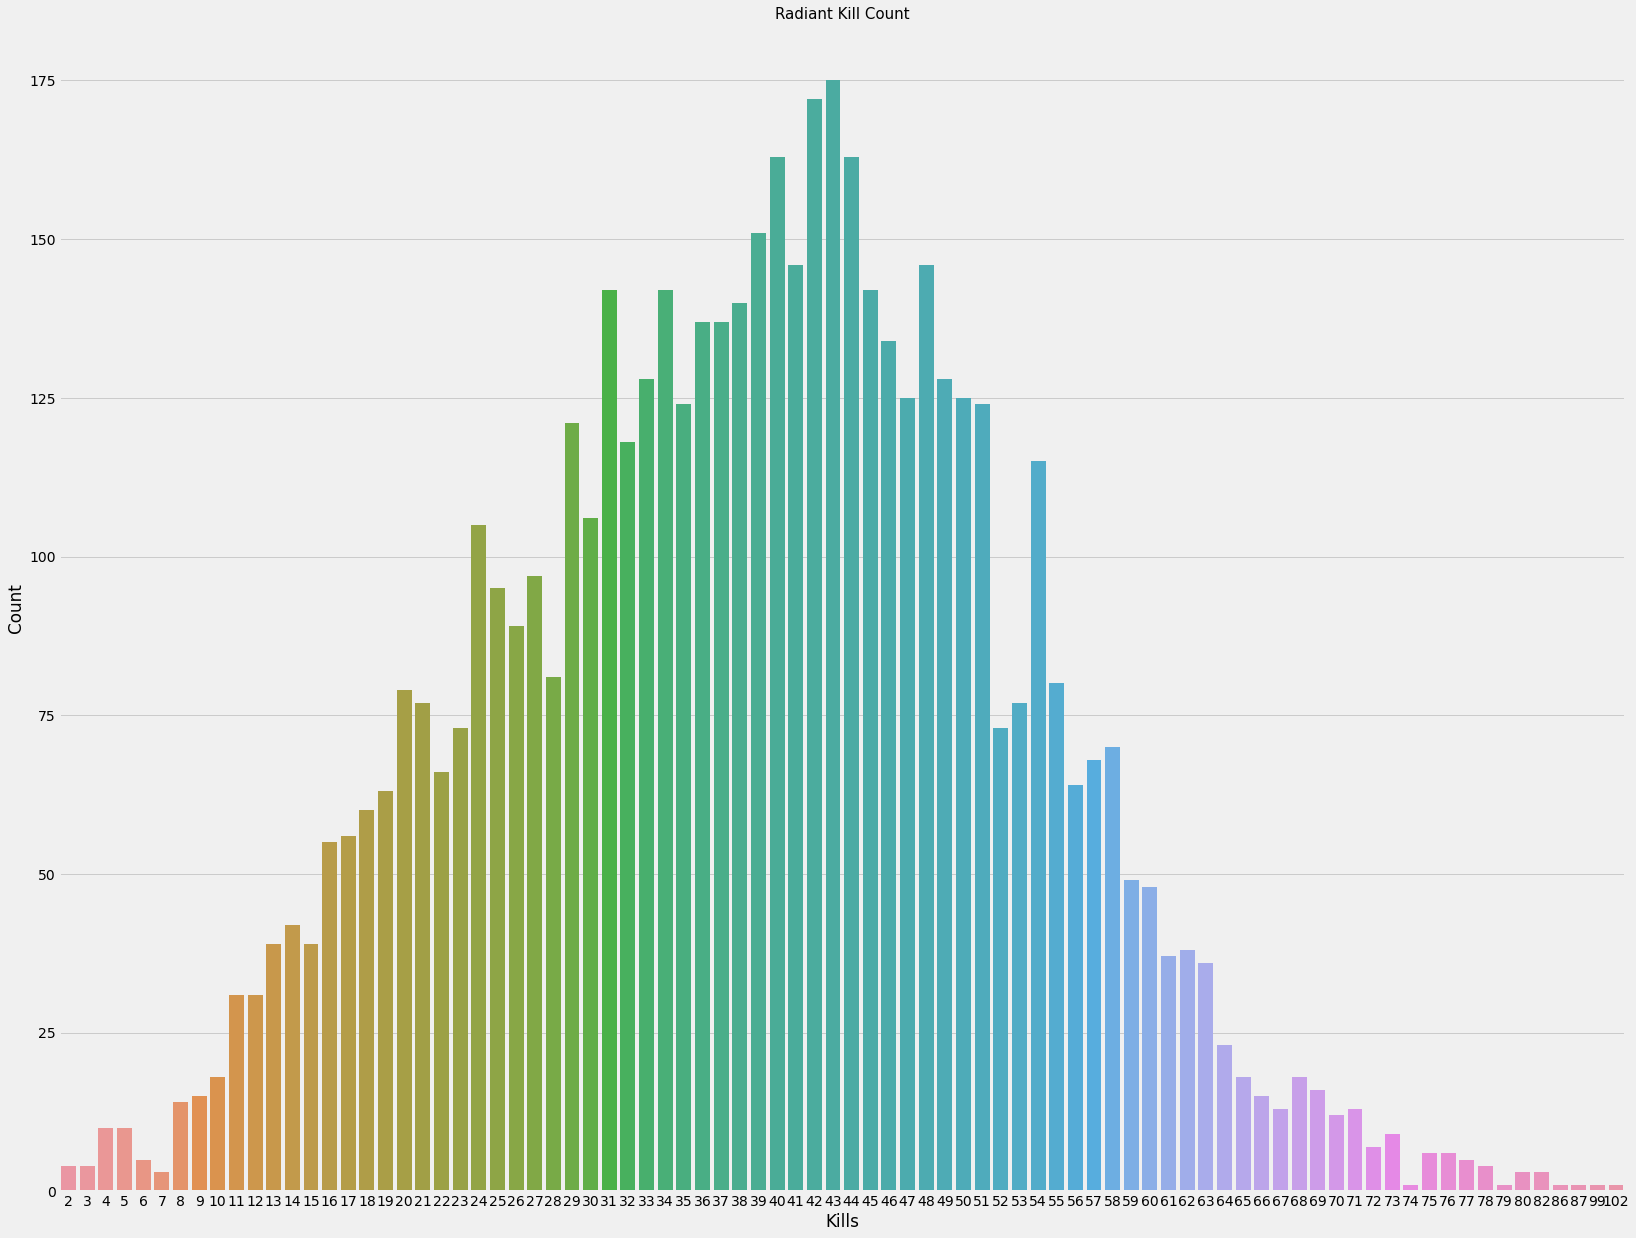

In [15]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.radiant_score.sort_values())
plt.title("Radiant Kill Count",fontsize=15)
plt.xlabel('Kills', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


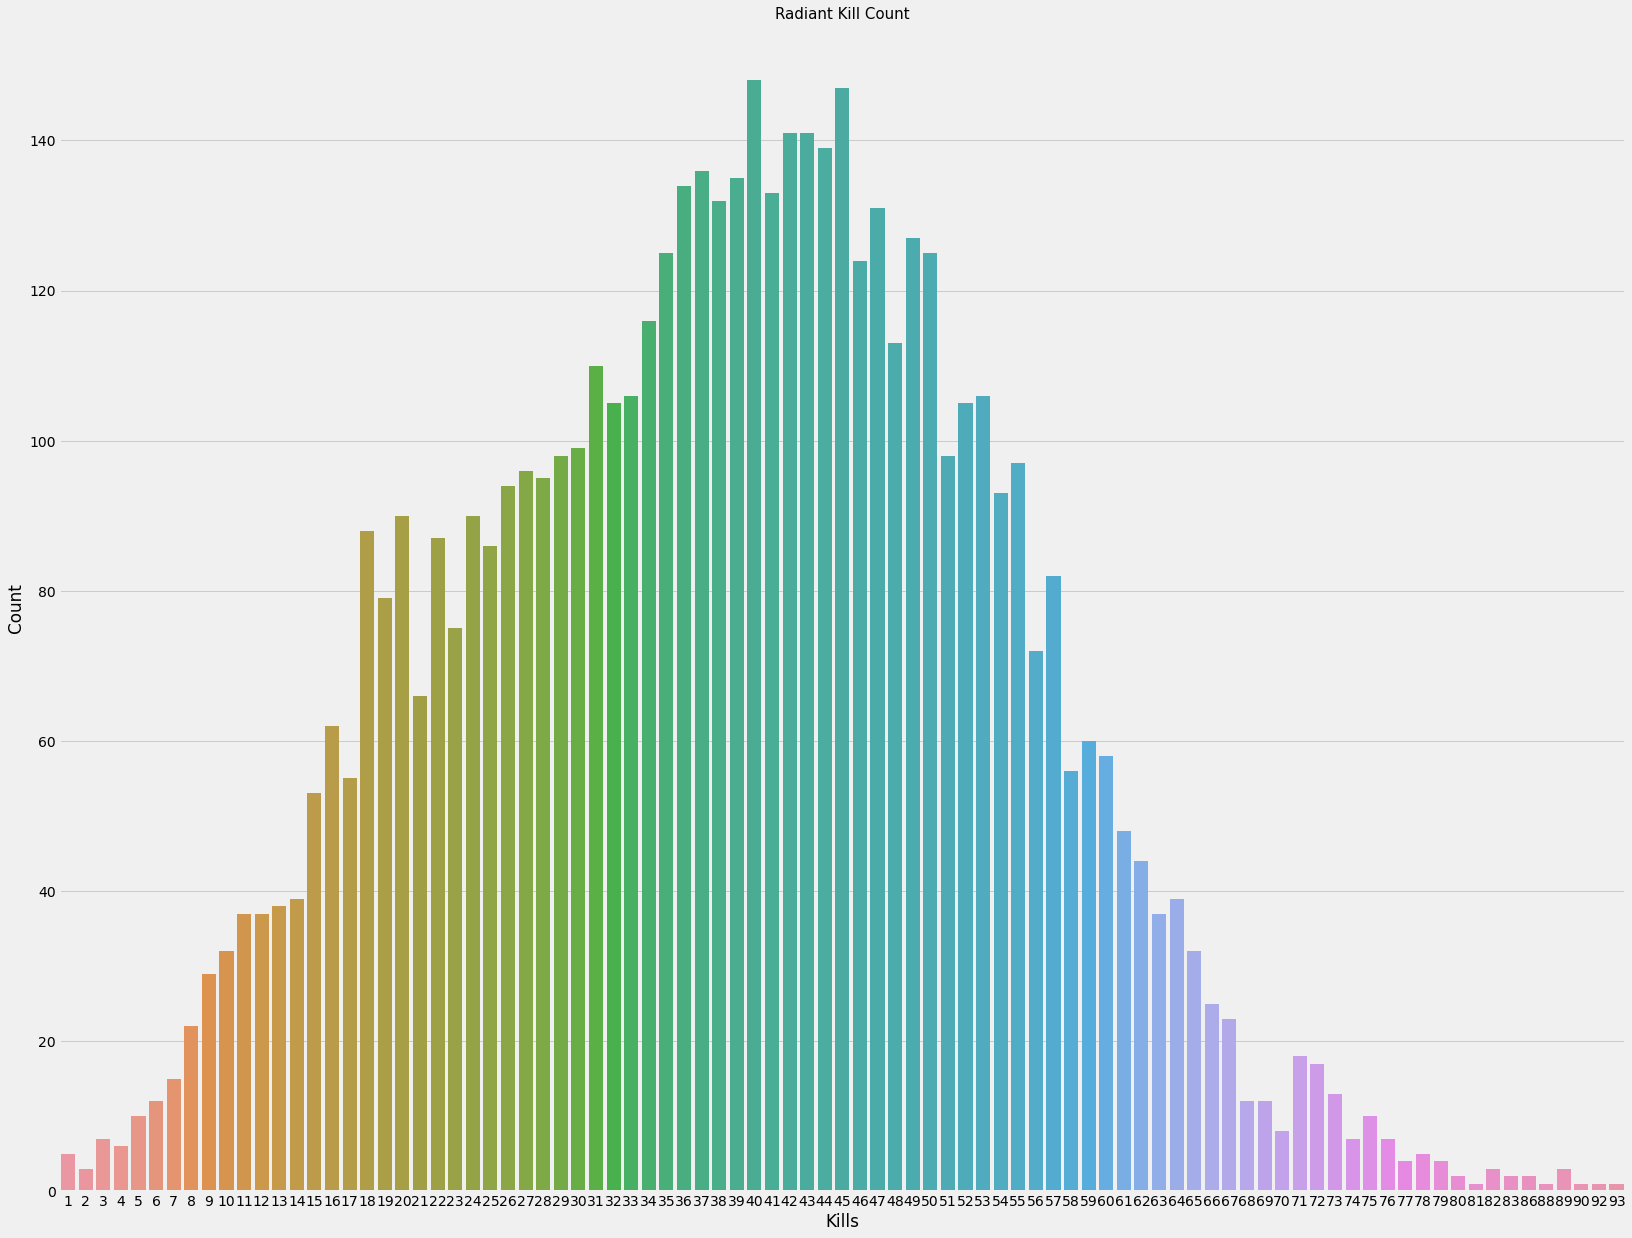

In [16]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.dire_score.sort_values())
plt.title("Radiant Kill Count",fontsize=15)
plt.xlabel('Kills', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

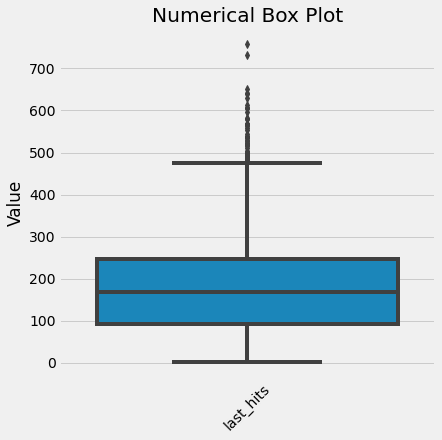

In [17]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['last_hits']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


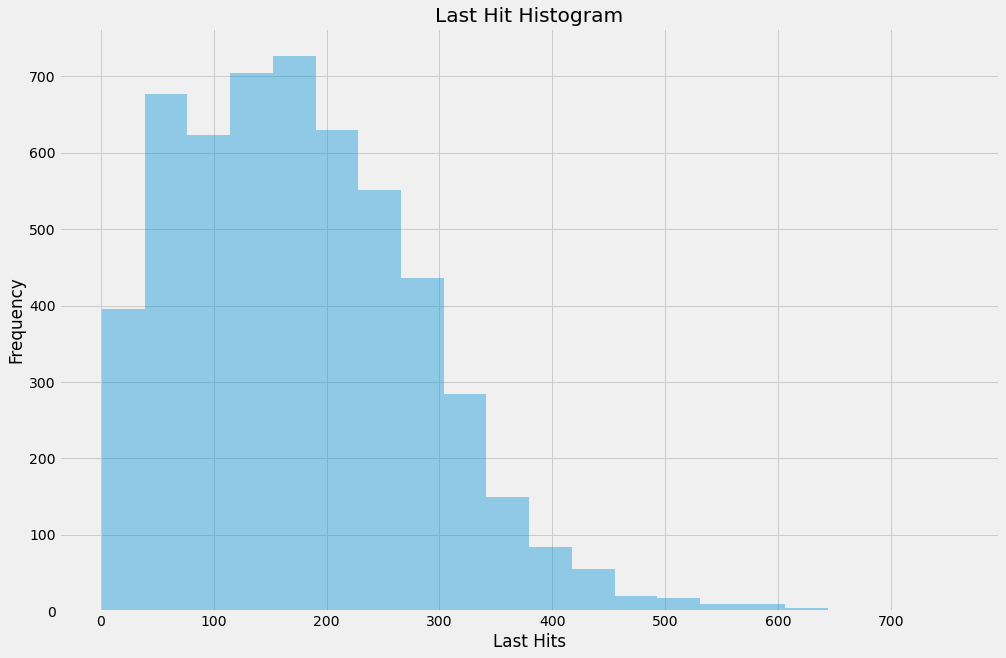

In [18]:
plt.figure(figsize=(15,10))
sns.distplot(data.last_hits, kde=False, bins=20, label='Last Hits');
plt.title("Last Hit Histogram");
plt.xlabel('Last Hits');
plt.ylabel('Frequency');

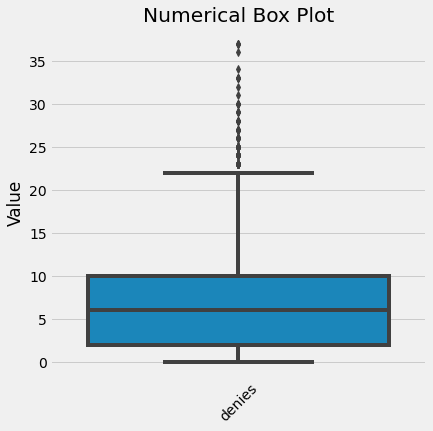

In [19]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['denies']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


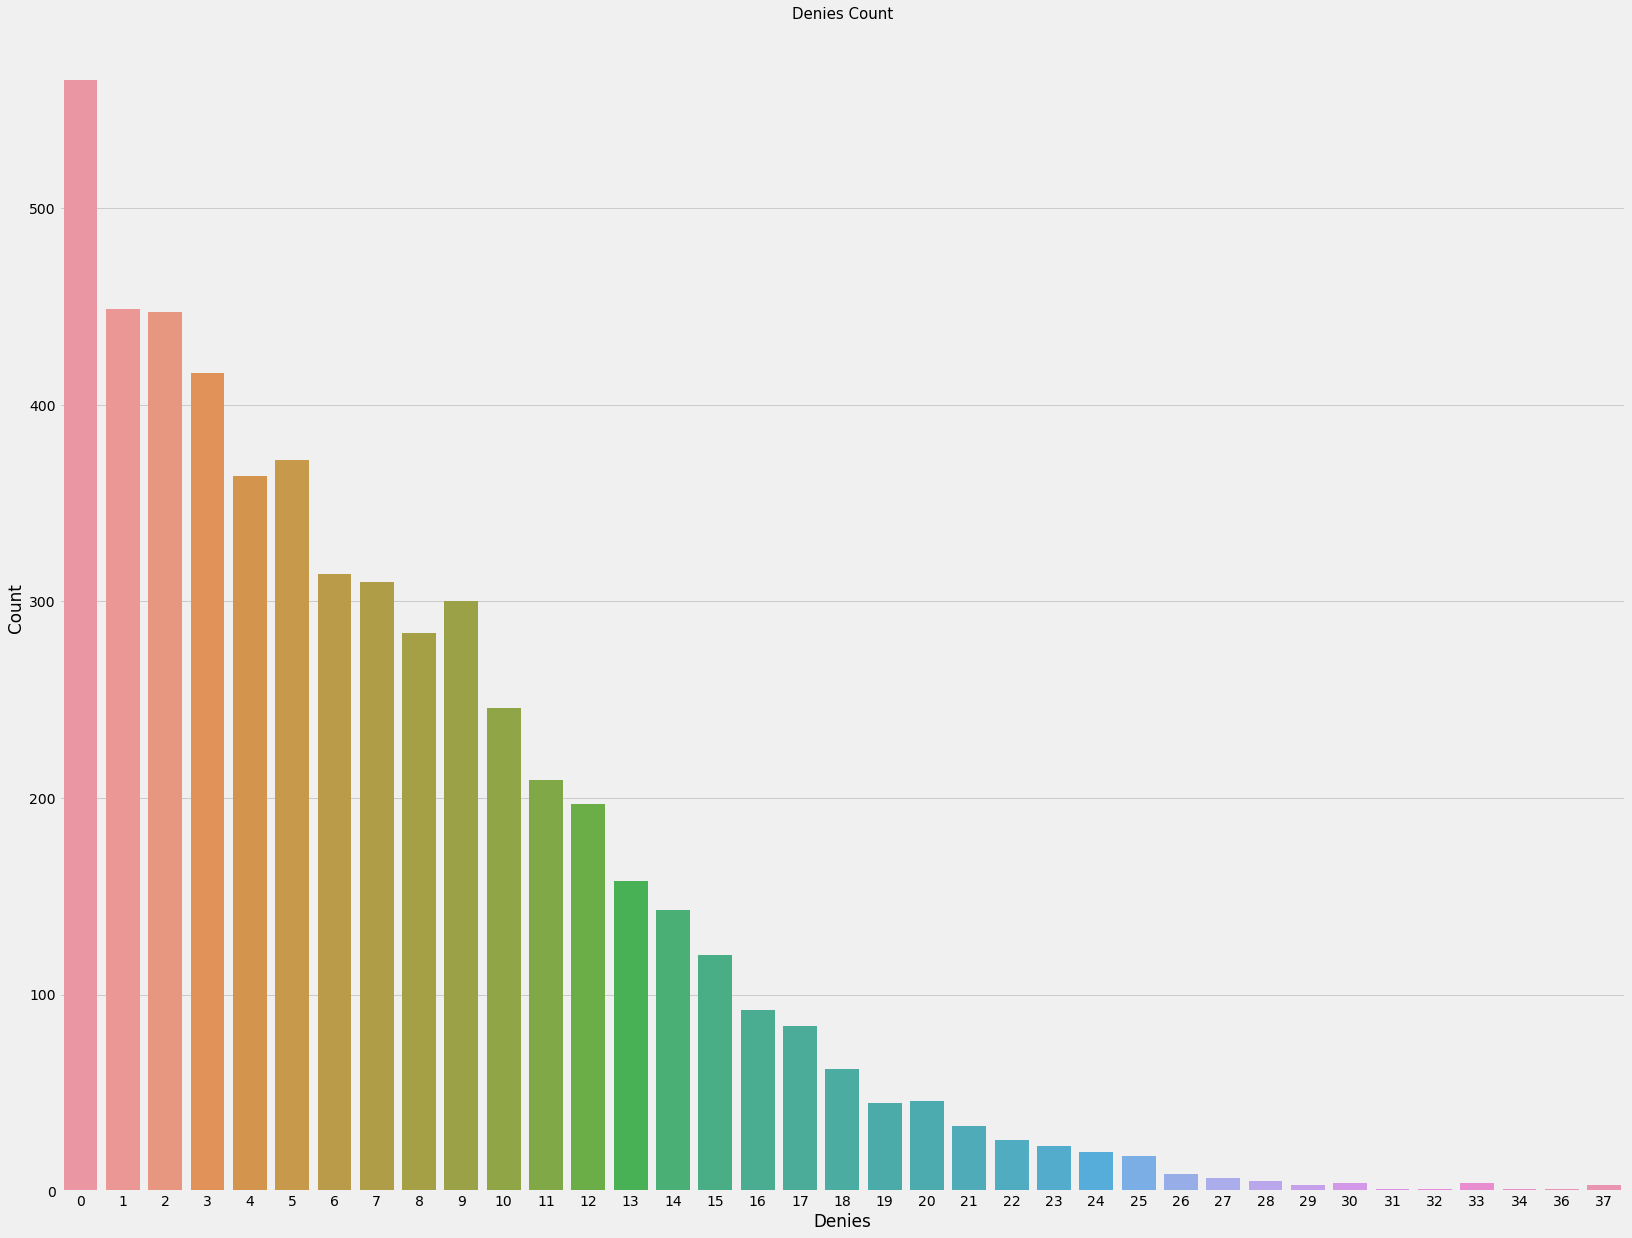

In [20]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.denies.sort_values())
plt.title("Denies Count",fontsize=15)
plt.xlabel('Denies', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

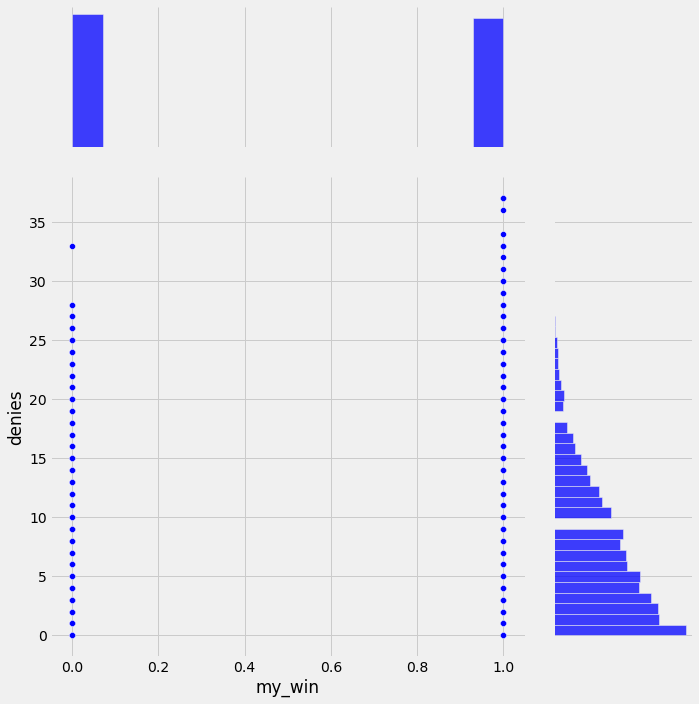

In [21]:
sns.jointplot(x="my_win", y="denies", data=df, height=10, ratio=3, color="blue")
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


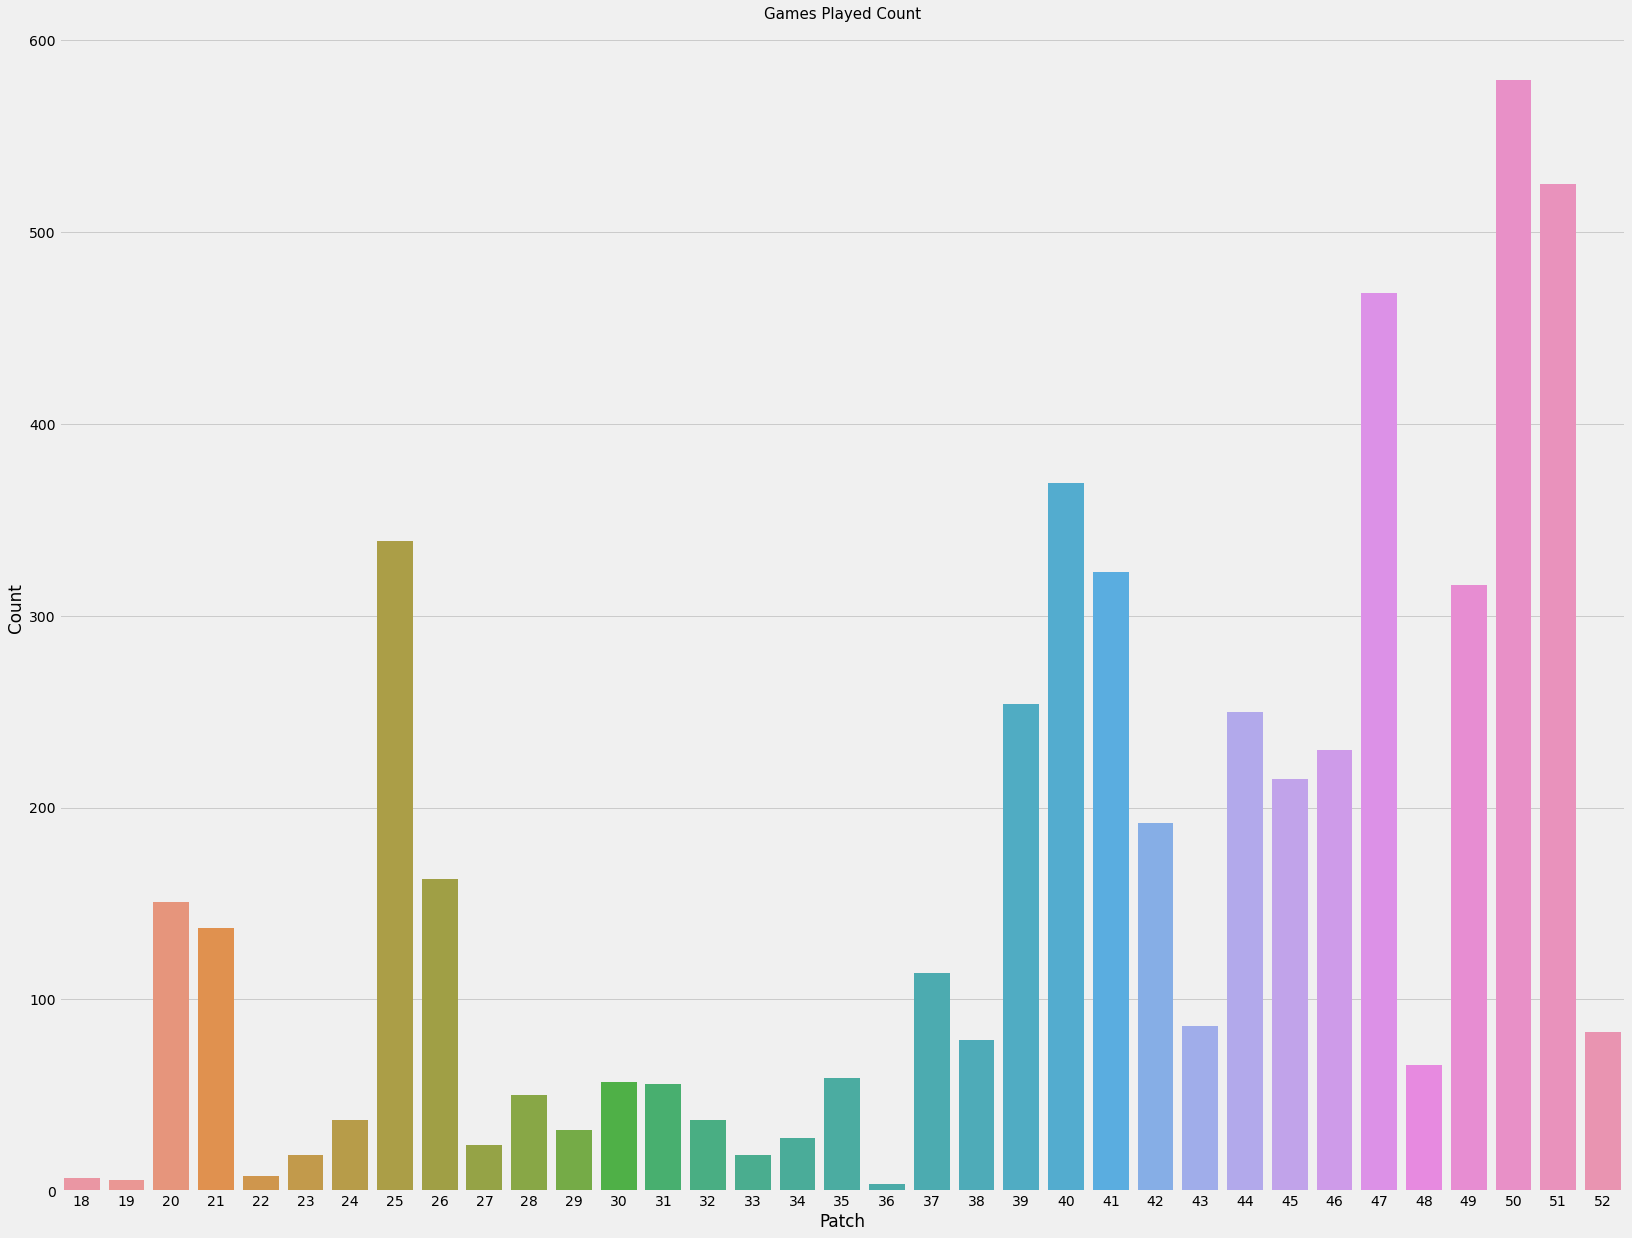

In [22]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.patch.sort_values())
plt.title("Games Played Count",fontsize=15)
plt.xlabel('Patch', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


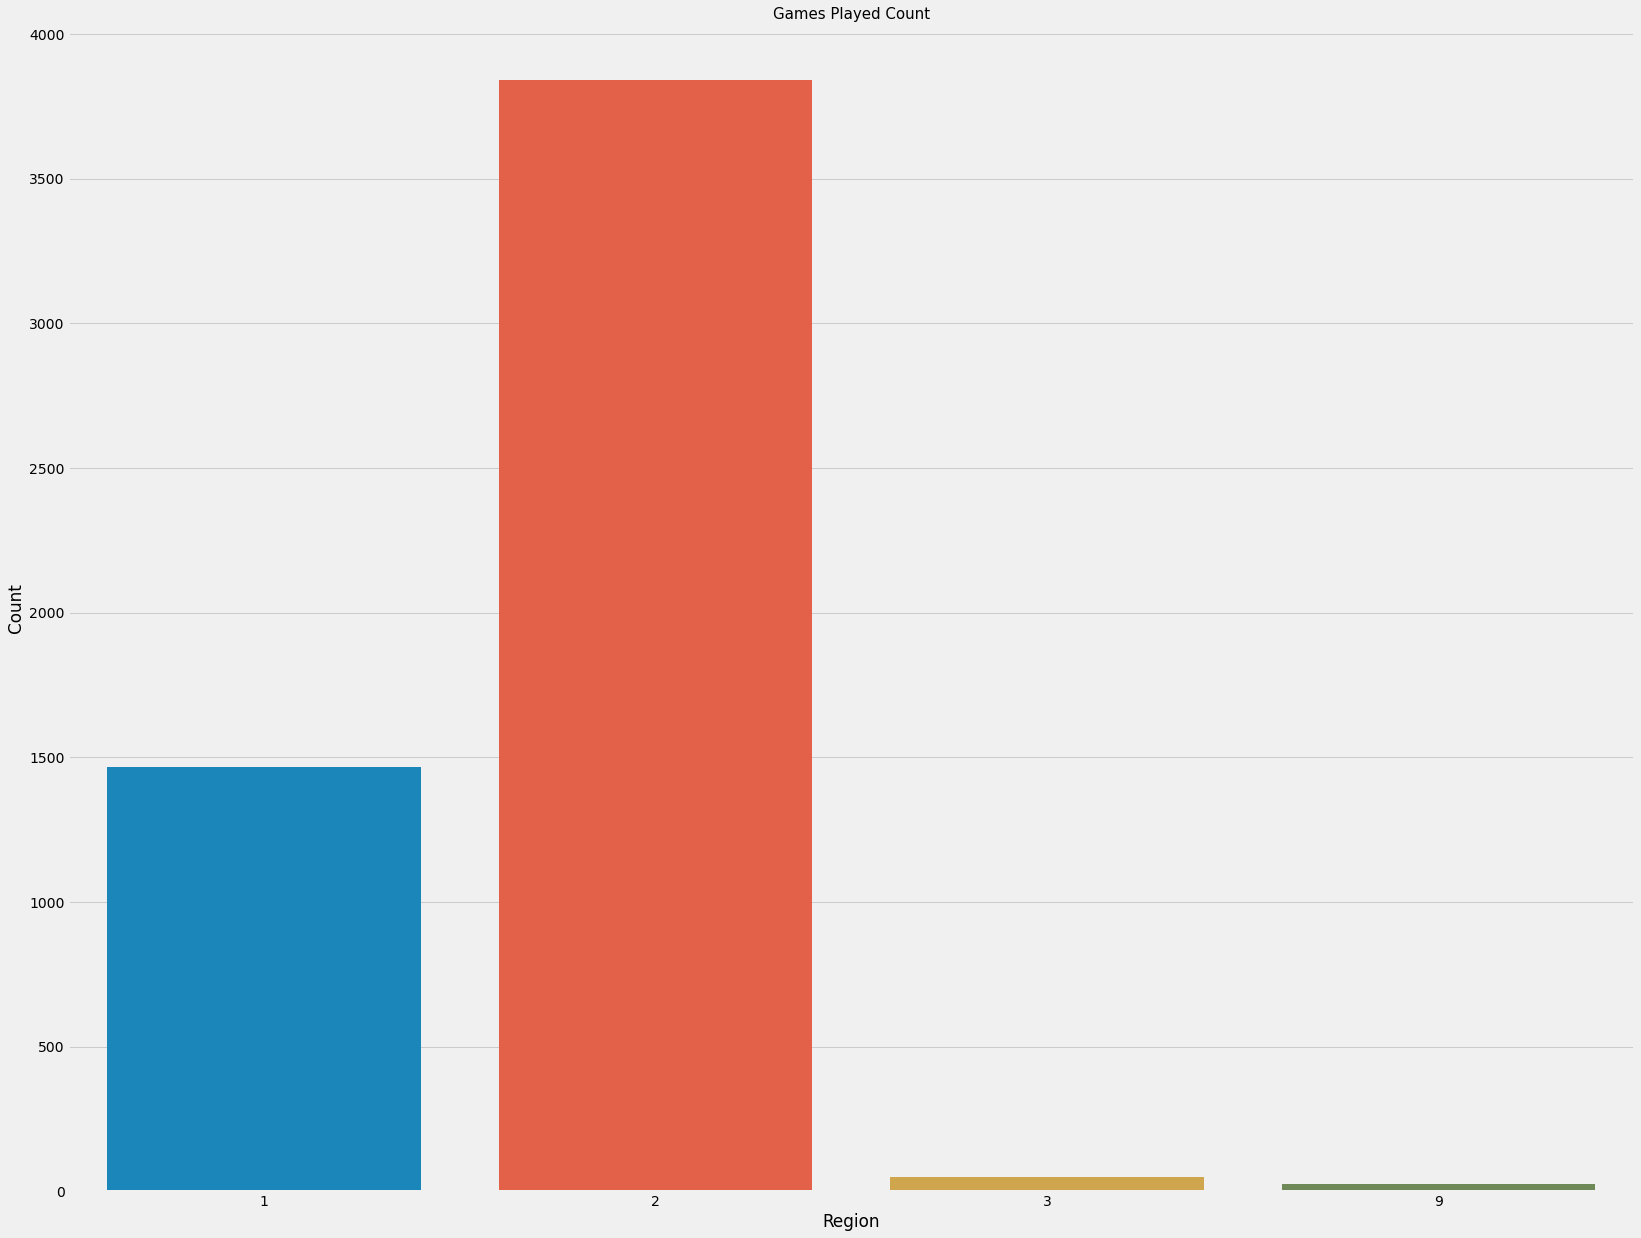

In [23]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.region.sort_values())
plt.title("Games Played Count",fontsize=15)
plt.xlabel('Region', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

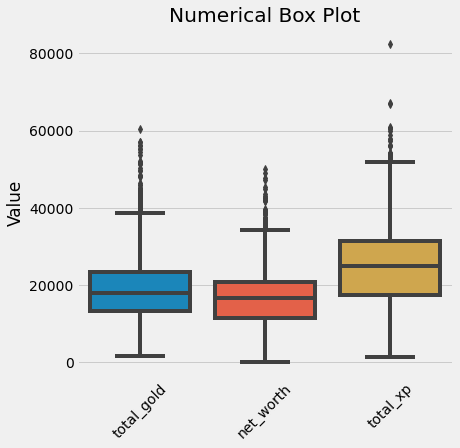

In [24]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['total_gold', 'net_worth', 'total_xp']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

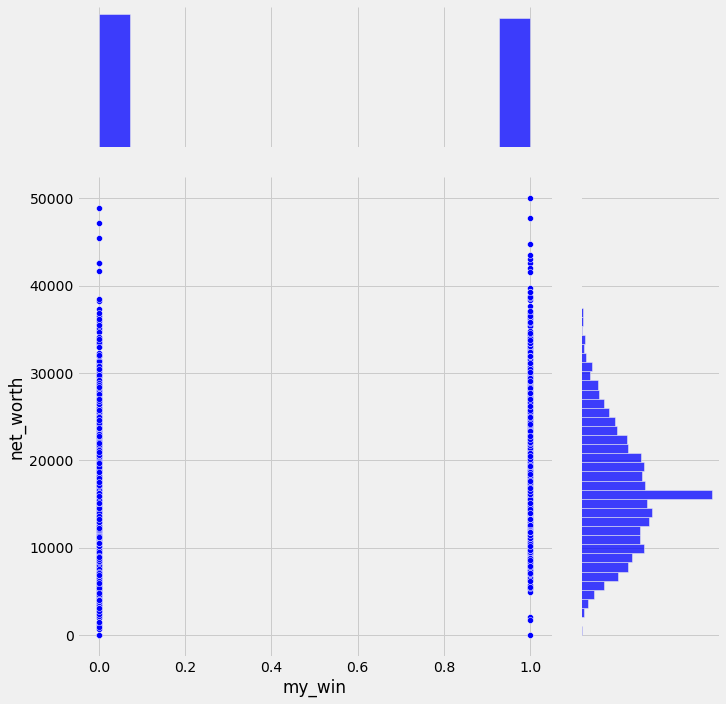

In [25]:
sns.jointplot(x="my_win", y="net_worth", data=df, height=10, ratio=3, color="blue")
plt.show()

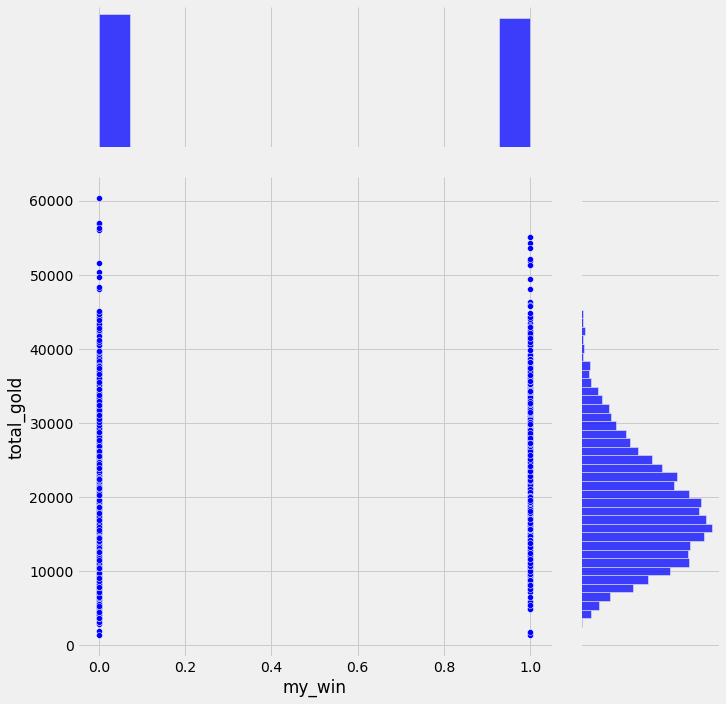

In [26]:
sns.jointplot(x="my_win", y="total_gold", data=df, height=10, ratio=3, color="blue")
plt.show()

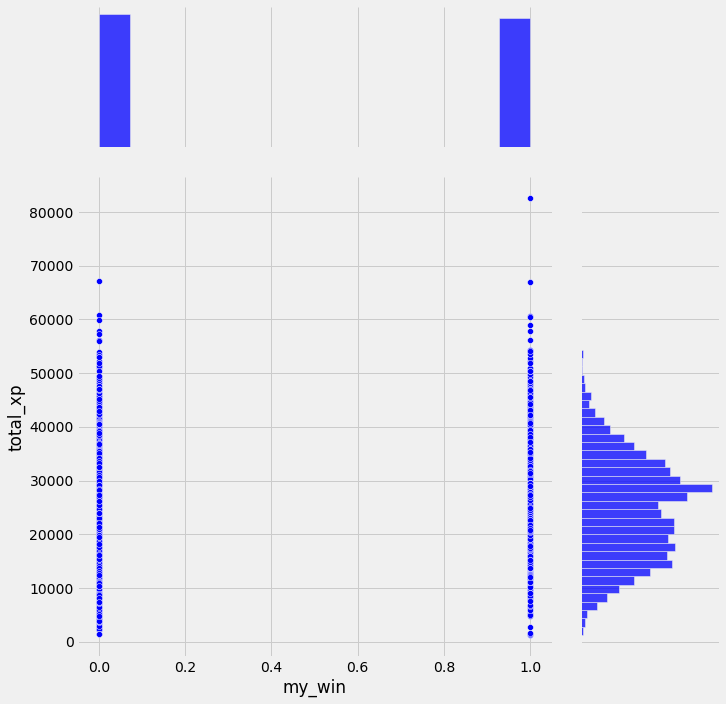

In [27]:
sns.jointplot(x="my_win", y="total_xp", data=df, height=10, ratio=3, color="blue")
plt.show()

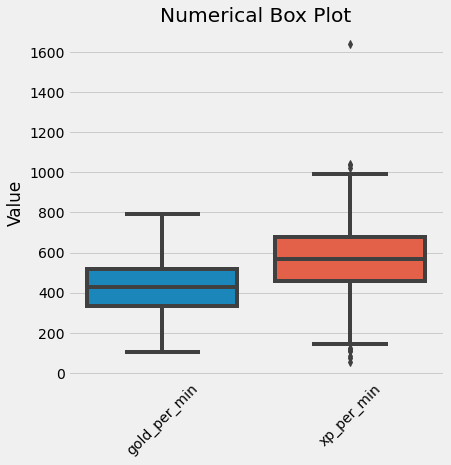

In [28]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['gold_per_min', 'xp_per_min']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

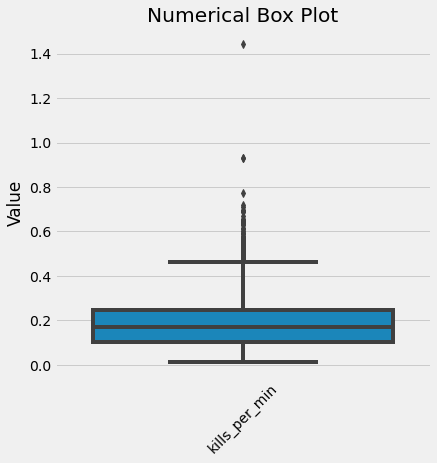

In [29]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['kills_per_min']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

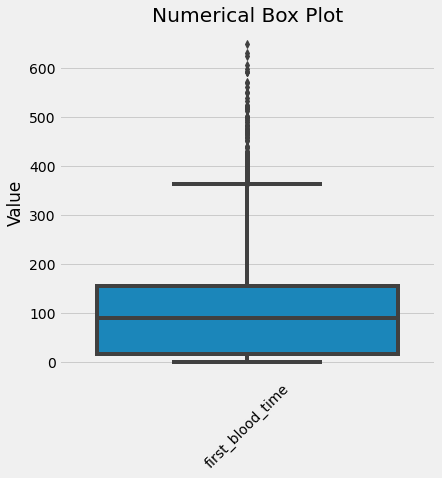

In [30]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['first_blood_time']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

In [31]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
0,0,7150274721,3,63,117,9,1621,0,22,7,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",39,1683851172,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,0,1,0,0,0,3,4,372,94,0,88,236,36,63,0,147,288.00,0,1,0.04,209,0,14,9869.00,10050,11157,413,94,0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,0.60,0,1800,800,0,0,1,1,1,1,0,0,0,0,0
1,0,7150256183,51,63,117,15,1764,17,22,7,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",43,1683848869,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,0,5,0,0,0,5,7,393,12,0,174,75,63,61,36,147,331.00,1,1,0.03,168,0,16,10968.00,11554,14494,493,12,2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,0.60,2,1800,800,0,0,0,1,0,0,1,0,1,1,0
2,0,7150214339,3,63,117,42,3274,24,22,7,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",43,1683844129,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,0,10,0,0,4204,4,9,593,67,0,137,208,40,160,63,147,362.00,5,15,0.27,396,0,27,29983.00,32358,44199,810,67,2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,0,1800,800,0,0,0,1,0,1,1,0,0,0,0
3,0,7150179312,63,0,117,38,1739,138,22,7,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",10,1683840942,1983,0,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,0,Techies,0,2,0,0,0,9,2,205,105,1,0,60,0,0,0,180,675.00,0,2,0.07,51,0,11,5269.00,5941,7361,254,105,0.25,75,1.00,3.00,12,14,19,14,25,2.50,1.30,3.00,700,900,1.70,100,0.50,300,0.60,6,1800,800,1,1,1,0,1,0,0,0,1,0,0
4,0,7148918745,3,15,117,68,3743,65,22,7,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",80,1683771256,6,32,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,129,Spectre,0,27,0,0,0,11,11,614,67,0,160,208,137,127,63,147,309.00,3,11,0.18,388,0,29,30477.00,38303,46350,743,67,2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,0,1800,800,0,0,0,1,0,1,1,0,0,0,0


In [32]:
data.describe()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,radiant_score,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
count,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00
mean,0.49,5160228771.16,36.79,36.72,120.77,38.84,2587.07,106.55,20.81,5.75,38.78,1583726077.60,936.71,1009.23,40.98,1.77,65.68,0.00,12.50,33.62,19.81,17.27,7.04,6.98,428.66,43.20,0.50,116.12,131.37,124.38,110.75,100.39,133.98,218.40,3.02,7.93,0.19,177.27,0.03,22.08,16513.03,18808.17,24731.41,562.86,43.20,0.83,75.54,0.08,0.45,27.42,32.82,20.22,21.20,17.70,2.42,2.47,2.02,310.82,917.38,1.66,103.15,0.40,297.70,0.65,1.96,1799.81,836.45,0.50,0.89,0.39,0.85,0.56,0.33,0.53,0.38,0.48,0.33,0.17
std,0.50,1254701996.04,28.18,29.03,6.00,15.08,621.25,100.84,4.84,2.68,13.87,58975481.10,922.53,932.41,9.39,0.68,64.02,0.05,6.46,115.55,83.16,86.33,3.63,5.89,120.24,35.54,0.50,121.17,118.93,94.58,85.50,101.35,139.62,254.50,3.37,5.28,0.11,105.78,0.21,4.35,6828.12,7772.39,9526.74,148.96,35.54,0.64,4.92,0.20,1.29,8.16,8.96,3.80,6.87,3.93,0.59,0.82,0.75,190.01,627.15,0.12,7.90,0.10,13.15,0.10,0.87,13.63,155.91,0.50,1.23,0.49,0.36,0.50,0.47,0.50,0.48,0.50,0.47,0.38
min,0.00,2801482629.00,0.00,0.00,111.00,1.00,406.00,0.00,1.00,0.00,2.00,1480060797.00,0.00,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.00,0.00,4.00,1.00,1380.00,1204.00,55.00,1.00,0.25,75.00,0.00,-3.00,6.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,1.40,90.00,0.17,275.00,0.60,0.00,800.00,800.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,4031830600.50,0.00,0.00,118.00,28.00,2151.00,16.00,22.00,7.00,29.00,1532895111.75,0.00,0.00,37.00,1.00,2.00,0.00,8.00,0.00,0.00,0.00,4.00,2.00,336.00,8.00,0.00,50.00,63.00,63.00,48.00,29.00,36.00,0.00,1.00,4.00,0.10,93.00,0.00,19.00,11490.25,13106.25,17343.25,457.00,8.00,0.25,75.00,0.00,0.00,22.00,26.00,19.00,17.00,15.00,2.00,1.70,1.40,150.00,900.00,1.70,100.00,0.30,290.00,0.60,2.00,1800.00,800.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,5311643330.00,51.00,51.00,121.00,39.00,2519.50,90.00,22.00,7.00,39.00,1585065186.50,386.00,1536.00,44.00,2.00,4.00,0.00,12.00,0.00,0.00,0.00,7.00,6.00,428.00,35.00,1.00,90.00,127.00,116.50,108.00,77.00,143.00,212.00,2.00,7.00,0.17,167.00,0.00,23.00,16443.00,17864.00,24798.00,570.00,35.00,0.50,75.00,0.00,0.00,29.00,35.00,20.00,21.00,17.00,2.30,2.80,1.80,150.00,900.00,1.70,100.00,0.40,300.00,0.60,2.00,1800.00,800.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,1.00,6332481867.25,63.00,63.00,122.00,49.00,2949.25,155.00,22.00,7.00,48.00,1640041397.00,1972.00,1974.00,49.00,2.00,130.00,0.00,16.00,11.00,0.00,0.00,9.00,10.00,519.00,67.00,1.00,1

In [33]:
dire_IQR = 49 - 28
print(dire_IQR)
print("lower interval", 28 - 1.5 * dire_IQR)
print("higher interval", 49 + 1.5 * dire_IQR)

21
lower interval -3.5
higher interval 80.5


In [34]:
radiant_IQR = 48 - 29
print(radiant_IQR)
print("lower interval", 29 - 1.5 * radiant_IQR)
print("higher interval", 48 + 1.5 * radiant_IQR)

19
lower interval 0.5
higher interval 76.5


In [35]:
deaths_IQR = 9 - 4
print(deaths_IQR)
print("lower interval", 4 - 1.5 * deaths_IQR)
print("higher interval", 9 + 1.5 * deaths_IQR)

5
lower interval -3.5
higher interval 16.5


In [36]:
denies_IQR = 10 - 2
print(denies_IQR)
print("lower interval", 2 - 1.5 * denies_IQR)
print("higher interval", 10 + 1.5 * denies_IQR)

8
lower interval -10.0
higher interval 22.0


In [37]:
level_IQR = 25 - 19
print(level_IQR)
print("lower interval", 19 - 1.5 * level_IQR)
print("higher interval", 25 + 1.5 * level_IQR)

6
lower interval 10.0
higher interval 34.0


In [38]:
nw_IQR = 20626 - 11490.25
print(nw_IQR)
print("lower interval", 11490.25 - 1.5 * nw_IQR)
print("higher interval", 20626 + 1.5 * nw_IQR)

9135.75
lower interval -2213.375
higher interval 34329.625


In [39]:
gold_IQR = 23357.50 - 13106.25
print(gold_IQR)
print("lower interval", 13106.25 - 1.5 * gold_IQR)
print("higher interval", 23357.50 + 1.5 * gold_IQR)

10251.25
lower interval -2270.625
higher interval 38734.375


In [40]:
xp_IQR = 31279.75 - 17343.25
print(xp_IQR)
print("lower interval", 17343.25 - 1.5 * xp_IQR)
print("higher interval", 31279.75 + 1.5 * xp_IQR)

13936.5
lower interval -3561.5
higher interval 52184.5


In [41]:
# rate 75% - 25%
kda_IQR = 4 - 1
print(kda_IQR)
print("lower interval", 1 - 1.5 * kda_IQR)
print("higher interval", 4 + 1.5 * kda_IQR)

3
lower interval -3.5
higher interval 8.5


In [42]:
kill_IQR = 11 - 4
print(kill_IQR)
print("lower interval", 4 - 1.5 * kill_IQR)
print("higher interval",11 + 1.5 * kill_IQR)

7
lower interval -6.5
higher interval 21.5


In [43]:
lh_IQR = 246 - 93
print(lh_IQR)
print("lower interval", 93 - 1.5 * lh_IQR)
print("higher interval", 246 + 1.5 * lh_IQR)

153
lower interval -136.5
higher interval 475.5


In [44]:
assists_IQR = 16 - 8
print(assists_IQR)
print("lower interval", 8 - 1.5 * assists_IQR)
print("higher interval", 16 + 1.5 * assists_IQR)

8
lower interval -4.0
higher interval 28.0
